<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>



# <h1 align="center" id="heading">Phase I - Proof of Concept</h1>



## ☑️ Objectives
At the end of this session, you will have a brief understanding of how to:
- [ ] Find and run pre-trained models (Phase I)
- [ ] Evaluate results from pre-trained models (Phase I)
- [ ] Run a pre-trained model using real Reddit data (Phase I)


## 🛠️ Pre-Assignment
1. Create a virtual environment with 🐍 conda : `conda env create -f environment.yml`

2. Activate your conda virtual environment: `conda activate tsla_bot`

3. Create a .env file in the root directory and add the following variables:
4. 
   `STOCK_API_KEY` : API key from [twelvedata](https://twelvedata.com/pricing)

   `REDDIT_API_CLIENT_ID` : client ID of your reddit app
   
   `REDDIT_API_CLIENT_SECRET`: client secret of your reddit app
   
   Follow this tutorial to generate your own Reddit credentials:
   <https://www.jcchouinard.com/get-reddit-api-credentials-with-praw/>

4. Continue in this notebook



## Background


After the meeting with your boss, and reviewing your [notes](https://www.notion.so/Analyzing-Market-Sentiment-Phase-I-II-and-II-End-to-End-MLOps-with-Open-Source-Tools-dc4b846108b44f6bb2962d550368560c#54cc350bc95041ee873dabde36930af1) 📓, you're ready to get going on a Proof of Concept (POC)

A POC tests the validity of your hypothesis. It's a way to prove that your idea, task, app, or whatever else works!

There's no time to waste - you've got an idea - it's time to get testing it out! 🏁

### Step 1: Initial Imports and Variable Setting 📈

First things first: Let's set some variables that will help us going forward.

Though your boss suggested `"TSLA"`, you can use any active stock-symbol and subreddit!

**IMPORTANT**: Make sure you verify that your selected subreddit exists by navigating to the generated link after you run the following cell

In [53]:
from datetime import datetime, timedelta

### START CODE HERE

# Stock data to grab ex. "TSLA"
symbol = 'TSLA'

# subreddit to check
subreddit = 'teslainvestorsclub'

# Time interval granularity
# valid choices are "1week", "1month", "1day"
interval = '1day'

# set the beginning and end of the time range you'd like to analyze
# ensure you use the format "YYYY-MM-DD"
start_date = '2020-01-01'
end_date = '2022-06-30' 

### END CODE HERE

start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.strptime(end_date, '%Y-%m-%d')

print(f'reddit.com/r/{subreddit}')

reddit.com/r/teslainvestorsclub


In order to make sure we can import our `BotUtils.py`, we have to ensure we're running from the `TSLASentimentAnalyzer` folder. To do this, we can `cd` into that directory!

In [5]:
cd TSLASentimentAnalyzer

/mnt/c/Users/phutran/personal/into-mlops/W1/Phase_I-Proof_of_concept/TSLASentimentAnalyzer


### Step 2: Set Environment Variables ⛰️

Use the information you created in the instructions of the `README.md` to fill in the values below!

In [4]:
# define env variables for configuration
import os
from decouple import config
os.environ['REDDIT_API_CLIENT_ID'] = config("REDDIT_API_CLIENT_ID")
os.environ['REDDIT_API_CLIENT_SECRET'] = config("REDDIT_API_CLIENT_ID")
os.environ['STOCK_DATA_API_KEY'] = config("REDDIT_API_CLIENT_ID")

### Step 3: Get to Scraping 🌐

Now we're going to use the `scraper` module (found in the `TSLASentimentAnalyzer` folder) to "scrape" the subreddit of our choosing for posts!

⚗️ RESOURCES: 

[Web Scraping](https://www.parsehub.com/blog/what-is-web-scraping/)

[Reddit Post Options](https://www.reddit.com/r/help/comments/32eu8w/what_is_the_difference_between_newrising_hot_top/)

##### Initializing the Scraper

In [58]:
import pandas as pd
from loguru import logger
from TSLASentimentAnalyzer.classifier import predict
from TSLASentimentAnalyzer.scraper import RedditScraper
from TSLASentimentAnalyzer.config import settings

# # instantiating the reddit scraper
reddit = RedditScraper('teslainvestorsclub')

In [59]:
type(reddit)

TSLASentimentAnalyzer.scraper.RedditScraper

##### Helper Functions 🔨

Here are some helper functions to assist in collecting data!

In [60]:
from collections.abc import Callable

def load_comments(number: int, scraping_option: Callable) -> pd.DataFrame:
    '''
    loads comments from reddit using the RedditScraper using one of the options
    and returns a DataFrame

    Parameters
    ----------
    number : int
        number of posts to load comments from

    scraping_options: callable
        expects a select_scrap_type function
    '''
    comments = []
    for submission in scraping_option(number):
        comments.extend(reddit.get_comment_forest(submission.comments))
        logger.debug(
            submission.title,
            submission.num_comments,
            len(reddit.get_comment_forest(submission.comments)),
        )
    df = pd.DataFrame(comments)
    return df


def select_scrap_type(option: str) -> Callable:
    '''
    selects a method from the reddit object based on a given option
    '''
    if option == "Hot":
        return reddit.get_hot
        
    if option == "Rising":
        return reddit.get_rising

    if option == "New":
        return reddit.get_new

##### Loading & Processing the Reddit Comment Data

Let's scrape the 15 🔥 hottest 🔥 posts from your selected subreddit using the `load_data()` helper function!

In [61]:
# Scraping data from reddit
dfReddit = load_comments(2, select_scrap_type("Hot"))

2022-07-10 02:07:39.789 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f6458252d00>
2022-07-10 02:07:39.789 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f6458252d00>
2022-07-10 02:07:39.790 | DEBUG    | __main__:load_comments:19 - Daily Thread - July 09, 2022
2022-07-10 02:07:42.653 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f64347abc70>
2022-07-10 02:07:42.653 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-10 02:07:42.719 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=1, children=['i7h9jhn']>
2022-07-10 02:07:42.720 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': "Walked right into that one, no?  Where, precisely, was the government impeding anyo

2022-07-10 02:07:43.655 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-10 02:07:43.819 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=0, children=[]>
2022-07-10 02:07:43.820 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': 'Exactly, thesis is the same. Bitcoin from 2013 - 2017 taught me to be patient and to switch off emotions in investing :)', 'title': 'Long-running Thread for Detailed Discussion', 'id': 'iaja4kc', 'created_at': 1653911779, 'score': 1}]
2022-07-10 02:07:43.821 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <praw.models.comment_forest.CommentForest object at 0x7f64347abc70>
2022-07-10 02:07:43.822 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-10 02:07:43.822 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=1, children=['i7h9jhn']>
2022-07-10 02:07:43.822 | DE

2022-07-10 02:07:43.832 | INFO     | TSLASentimentAnalyzer.scraper:get_comment_forest:44 - more comments
2022-07-10 02:07:43.832 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:41 - <MoreComments count=0, children=[]>
2022-07-10 02:07:43.833 | DEBUG    | TSLASentimentAnalyzer.scraper:get_comment_forest:45 - [{'comment': 'Exactly, thesis is the same. Bitcoin from 2013 - 2017 taught me to be patient and to switch off emotions in investing :)', 'title': 'Long-running Thread for Detailed Discussion', 'id': 'iaja4kc', 'created_at': 1653911779, 'score': 1}]
2022-07-10 02:07:43.833 | DEBUG    | __main__:load_comments:19 - Long-running Thread for Detailed Discussion


In [63]:
dfReddit.tail()

,comment,title,id,created_at,score
552,Well there is NO possibility of the ICE compan...,Long-running Thread for Detailed Discussion,i8blqhc,1652365675,2
553,>Conspiracy theories towards the tslaq-crowd a...,Long-running Thread for Detailed Discussion,hyu6zjd,1646087929,5
554,You should have asked me what kind of analysts...,Long-running Thread for Detailed Discussion,i00lhi8,1646857319,3
555,"RemindMe! 3 years ""Call from April 2022. What'...",Long-running Thread for Detailed Discussion,i4gfftu,1649785476,1
556,and we don't know when and for what he bought....,Long-running Thread for Detailed Discussion,iaj5foc,1653908286,1


Once we have our comments, let's use the [`pandas.Series.str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) method to ensure our data will play nicely with our model. (`bert` only supports up to a maximum of 512 tokens, so a range of `0` to `512` seems appropriate)

In [64]:
# slice comments as bert supports only 512 tokens
dfReddit['comment'] = dfReddit['comment'].str.slice(0, 1000)

### Step 5: Analyze the Comments! 🔍


We'll be using the `FourthBrain/bert_model_reddit_tsla` model (found [here](https://huggingface.co/FourthBrain/bert_model_reddit_tsla)), which is based off of the `distilbert-base-uncased` (found [here](https://huggingface.co/distilbert-base-uncased))

We'll use this model in a `sentiment-analysis` pipeline! (read all about that [here](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline.example))

In [65]:
from transformers import pipeline

# initialize the sentiment pipeline
sentiment_pipeline = pipeline('sentiment-analysis', 'FourthBrain/bert_model_reddit_tsla')


reddit_json = sentiment_pipeline(dfReddit["comment"].tolist())

# Retrieve labels and scores
dfReddit['label'] = [reddit_json[i]['label'] for i in range(0, len(reddit_json))]
dfReddit['score'] = [reddit_json[i]['score'] for i in range(0, len(reddit_json))]

Next up, we'll want to perform the following steps

1. Convert the `created_at` column to the appropriate format and name it `'timestamp'`
2. Normalize the dates using the `NormalizeDates()` helper function

In [66]:
import numpy as np
from BotUtils import NormalizeDates

# Rename timestamp column 
dfReddit = dfReddit.rename(columns={'created_at': 'timestamp'})
dfReddit['timestamp'] = [datetime.fromtimestamp(dt) for dt in dfReddit['timestamp'] ]

# Normalize Reddit sentiment data
dfReddit = NormalizeDates(dfReddit, timestamp_col="timestamp", interval=interval)

# Create a continous time series 
dfTimeSeries = pd.DataFrame(dfReddit["timestamp"])

### Step 6: Get Stock Data 🚀

Next up, we're going to get the stock data and create a DataFrame - as well as normalize the dates, just like we did with the subreddit comment timestamps

In [67]:
from BotUtils import GetStockData

# Get Stock Data
j, dfStockData = GetStockData(settings.stock_data_api_key, symbol=symbol, start_date=start_date, end_date=end_date, interval='1day')
dfStockData = dfStockData[(dfStockData['timestamp'] >= start_date) & (dfStockData['timestamp'] <= end_date)]

# Normalize stock price data
dfStockData = NormalizeDates(dfStockData, timestamp_col="timestamp", interval=interval)

### Step 7: Merge Sentiment and Stock Data 🧬

We've got some processing to do! 

In [68]:
# Join time series df with stock price df and reddit df
dfSentiment = dfTimeSeries.merge(dfStockData, how='left', on="timestamp")
dfSentiment = dfSentiment.merge(dfReddit, how='left', on="timestamp")

# Filter down to only the columns that we'll be using 
dfSentiment = dfSentiment[['timestamp', 'close', 'volume', 'label', 'score']]

# Clean up NaNs for closing price, score, and labels
dfSentiment['close'] = dfSentiment['close'].fillna(0)
dfSentiment['score'] = dfSentiment['score'].fillna(0)
dfSentiment['label'] = dfSentiment['label'].fillna('NEUTRAL')
dfSentiment['label'] = ['NEGATIVE' for s in dfSentiment['label'] == 'LABEL_0']
dfSentiment['label'] = ['POSITIVE' for s in dfSentiment['label'] == 'LABEL_1']

# Convert close from string to float
dfSentiment['close'] = dfSentiment['close'].astype('float')

# Calculate weighted sentiment
dfSentiment['sentiment'] = [1 if sentiment == "POSITIVE"  else 0 if sentiment == "NEUTRAL" else -1 for sentiment in dfSentiment['label'].tolist() ]
dfSentiment['weighted_sentiment'] = dfSentiment['sentiment'] * dfSentiment['score']

# Count only the POSITIVE and NEGATIVE labels (NEUTRAL is just a filler for missing dates)
dfSentiment['counter'] = [1 if sentiment == "POSITIVE"  else 1 if sentiment == "NEGATIVE" else 0 for sentiment in dfSentiment['label'].tolist() ]

# Group by to calculate Reddit post count and sentiment score (mean of weighted sentiment)
dfSentiment = dfSentiment.groupby('timestamp') \
       .agg({'counter':'sum', 'close':'max', 'volume':max, 'weighted_sentiment':'mean'}) \
       .rename(columns={'sentiment':'count_posts', 'weighted_sentiment':'sentiment_score'}) \
       .reset_index()


In [69]:
dfSentiment

,timestamp,counter,close,volume,sentiment_score
0,2022-02-24,16,800.77002,45107400,0.832785
1,2022-02-25,529,809.87000,25355900,0.892870
2,2022-02-26,4,0.00000,NaN,0.842336
3,2022-02-27,9,0.00000,NaN,0.865276
4,2022-02-28,256,870.42999,33002300,0.841660
...,...,...,...,...,...
100,2022-07-04,9,0.00000,NaN,0.911184
101,2022-07-05,9,0.00000,NaN,0.743754
102,2022-07-07,1,0.00000,NaN,0.858195
103,2022-07-08,1,0.00000,NaN,0.943165


### Step 8: Final Computation 🖥️

In this last step, we're going to finish up some calculations:

1. Create the lags and percentage change for the closing stock price. 
2. Calculate the 3 month rolling average.

In [71]:
# Create lags and %change for closing stock price
dfSentiment['close_lag1'] = dfSentiment['close'].shift(1)
dfSentiment['close_lag1'] = dfSentiment['close_lag1'].fillna(0)
dfSentiment['perc_change_close'] = (dfSentiment['close'] - dfSentiment['close_lag1']) / dfSentiment['close_lag1']
dfSentiment['perc_change_close'] = dfSentiment['perc_change_close'].fillna(0)

dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score'].shift(1)
dfSentiment['sentiment_score_lag1'] = dfSentiment['sentiment_score_lag1'].fillna(0)
dfSentiment['perc_change_sentiment'] = (dfSentiment['sentiment_score'] - dfSentiment['sentiment_score_lag1']) / dfSentiment['sentiment_score_lag1']

# Calculate 3 month rolling average
dfSentiment['sentiment_SMA3mo'] = dfSentiment.sentiment_score.rolling(3).mean()
dfSentiment['sentiment_SMA3mo'] = dfSentiment['sentiment_SMA3mo'].fillna(0)

dfSentiment = dfSentiment[1:]
dfSentiment

/tmp/ipykernel_15939/950472512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSentiment['close_lag1'] = dfSentiment['close'].shift(1)
/tmp/ipykernel_15939/950472512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSentiment['close_lag1'] = dfSentiment['close_lag1'].fillna(0)
/tmp/ipykernel_15939/950472512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,timestamp,counter,close,volume,sentiment_score,close_lag1,perc_change_close,sentiment_score_lag1,perc_change_sentiment,sentiment_SMA3mo
2,2022-02-26,4,0.00000,NaN,0.842336,809.87000,-1.000000,0.892870,-0.056597,0.000000
3,2022-02-27,9,0.00000,NaN,0.865276,0.00000,0.000000,0.842336,0.027235,0.866827
4,2022-02-28,256,870.42999,33002300,0.841660,0.00000,inf,0.865276,-0.027294,0.849757
5,2022-03-01,16,864.37000,24922300,0.853209,870.42999,-0.006962,0.841660,0.013723,0.853382
6,2022-03-02,25,879.89001,24881100,0.886103,864.37000,0.017955,0.853209,0.038553,0.860324
...,...,...,...,...,...,...,...,...,...,...
100,2022-07-04,9,0.00000,NaN,0.911184,0.00000,0.000000,0.864599,0.053881,0.833145
101,2022-07-05,9,0.00000,NaN,0.743754,0.00000,0.000000,0.911184,-0.183750,0.839846
102,2022-07-07,1,0.00000,NaN,0.858195,0.00000,0.000000,0.743754,0.153870,0.837711
103,2022-07-08,1,0.00000,NaN,0.943165,0.00000,0.000000,0.858195,0.099010,0.848371


Let's save our work in a `.csv` for use later in the Streamlit app!

In [72]:
# Save DataFrame locally (or somewhere else) for use in Streamlit app
dfSentiment.to_csv('./sentiment_data.csv')

### Step 8a: Plotting our Results! 📊

Now, after all that, let's plot our results and see how they shape up!

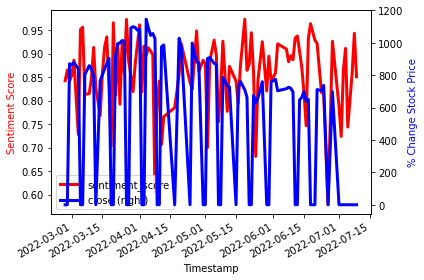

In [73]:
import matplotlib.pyplot as plt

ax1 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                  y = 'sentiment_score', color = 'Red',
                  linewidth = 3)

ax2 = dfSentiment.plot(kind = 'line', x = 'timestamp',
                   y = 'close', secondary_y = True,
                   color = 'Blue',  linewidth = 3,
                   ax = ax1) 

#labeling x and y-axis
ax1.set_xlabel('Timestamp', color = 'black')
ax1.set_ylabel('Sentiment Score', color = "r")
ax2.set_ylabel('% Change Stock Price', color = 'b')
 
#defining display layout
plt.tight_layout()
 
#show plot
plt.show()